In [9]:
from datasets import load_dataset
import numpy as np
import pandas as pd
from GHSOM import GHSOM
from help_functions import *

In [3]:
ds = load_dataset("lschoen/10kgnad")

In [12]:
df = pd.concat([ds['train'].to_pandas(), ds['test'].to_pandas()], axis=0)
df.drop(['label'], axis=1, inplace=True)
y = df['category']
label_names = np.unique(y)
label_mapping = {name: i for i, name in enumerate(label_names)}
y_int = y.map(label_mapping).to_numpy()
X = df.drop(['category'], axis=1).to_numpy()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.snowball import GermanStemmer
import nltk

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

In [14]:
stemmer = GermanStemmer()

def german_tokenizer(text):  
    tokens = nltk.word_tokenize(text, language='german')
    stems = [stemmer.stem(t) for t in tokens if t.isalpha()]
    return stems

tfidf_vectorizer = TfidfVectorizer(
    tokenizer=german_tokenizer,
    max_df=0.07,  
    min_df=0.0056, 
    norm='l2' 
)

In [15]:
X_sparse = tfidf_vectorizer.fit_transform(X.ravel())
X_tfidf = X_sparse.toarray()

C:\tom\moje\ViT-GHSOM\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:526: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [22]:
ghsom_deep = GHSOM(
    input_dim=X_tfidf.shape[1],
    t1=0.07,
    t2=0.0035,
    training_epoch_num=15,
    learning_rate=0.5,
    beta=0.999,
    use_qe_for_vertical=True,
    min_samples_vertical_grow=None,
    max_gsom_size=None,
    distance_k=2,
    neighbourhood_function='gaussian',
    decay_type='exponential'
)

In [23]:
ghsom_deep.train(X_tfidf)

Layer 0 Initialized, Global stopping criterion (tau2 * (qe0 or mqe0)): 35.6545


KeyboardInterrupt: 

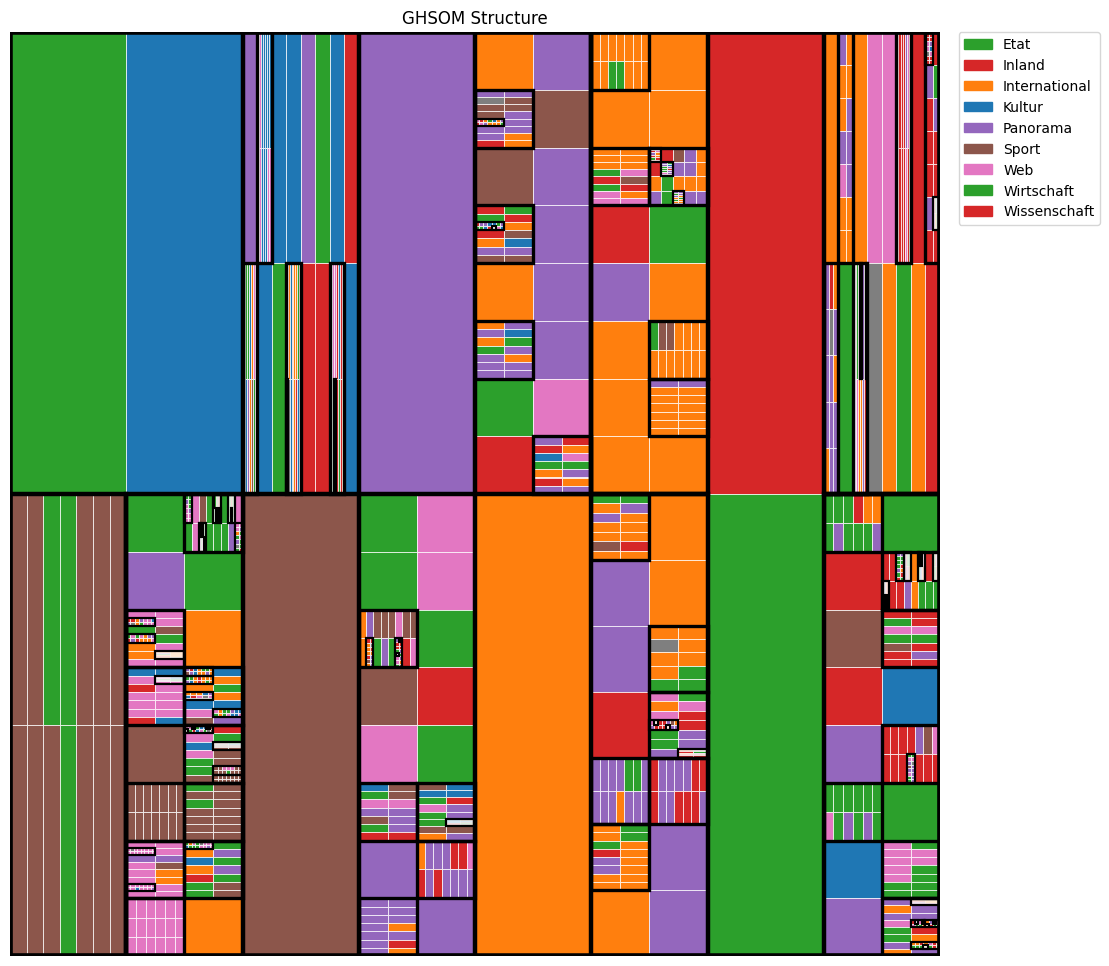

In [53]:
plot_ghsom(ghsom_deep, X_tfidf, y_int, label_names)

In [ ]:
ghsom_shallow = GHSOM(
    input_dim=X_tfidf.shape[1],
    t1=0.035,
    t2=0.0035,
    training_epoch_num=15,
    learning_rate=0.5,
    beta=0.999,
    use_qe_for_vertical=False,
    min_samples_vertical_grow=None,
    max_gsom_size=None,
    distance_k=2,
    neighbourhood_function='gaussian',
    decay_type='exponential'
)